In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movie-review-dataset/movies.csv
/kaggle/input/movie-review-dataset/sample.csv
/kaggle/input/movie-review-dataset/train.csv
/kaggle/input/movie-review-dataset/test.csv


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import re
from imblearn.under_sampling import RandomUnderSampler
from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report

In [4]:
#Loading the CSV into a DataFrames
train = pd.read_csv('/kaggle/input/movie-review-dataset/train.csv')
test = pd.read_csv('/kaggle/input/movie-review-dataset/test.csv')
moviedf = pd.read_csv("/kaggle/input/movie-review-dataset/movies.csv")

In [5]:
train.head()
#Returns the header row and the first 5 rows, or the specified number of rows

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [6]:
test.head()
#Returns the header row and the first 10 rows, or the specified number of rows

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...


In [7]:
moviedf.columns
#Returns the column labels of the DataFrame

Index(['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')

In [8]:
train.info()
#Prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [9]:
train.shape
#Returns the number of rows and columns of the DataFrame

(162758, 5)

In [10]:
train.isna().sum()
#The isna() method returns a DataFrame object where all the values are replaced with a Boolean value True for NA (not-a -number) values, and otherwise False.

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [11]:
train.dropna(inplace = True)
#Remove all rows wit NULL values from the DataFrame.

In [12]:
train['sentiment'].value_counts()
#Returns the number of unique rows
#counts pos & neg values

sentiment
POSITIVE    104719
NEGATIVE     51592
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

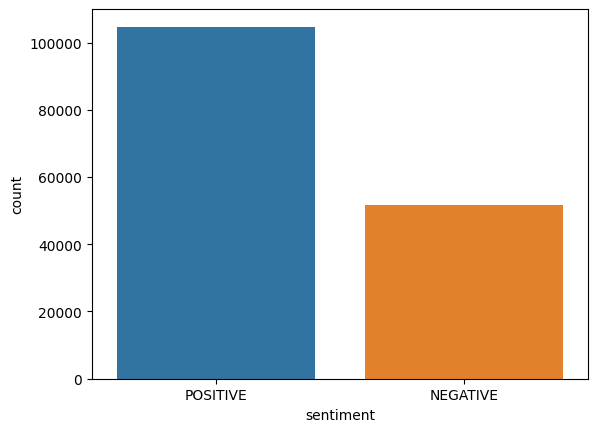

In [13]:
sns.countplot(x=train['sentiment'])
#Show the counts of observations in each categorical bin(Positive or Negetive Review) using bars.

In [14]:
train_enco = train['sentiment']
#Loads up train_enco variable with values of sentiment column
train = train.drop(['sentiment'], axis=1)
#Drops the specified column, Senitment from the Train DataFrame

In [15]:
train_enco.head()
#Returns the header row and the first 5 rows,
#Target class stored

0    POSITIVE
1    NEGATIVE
2    POSITIVE
3    POSITIVE
4    POSITIVE
Name: sentiment, dtype: object

In [16]:
#LabelEncoder can be used to normalize labels.
#It can also be used to transform non-numerical labels to numerical labels.
#Converts labels to numerical value (positive - 1, negative - 0)
label_enco = LabelEncoder()
train_enco = label_enco.fit_transform(train_enco)
#Fit label encoder and return encoded labels.
train_new = pd.DataFrame(train_enco, columns= ['sentiment'])

In [17]:
train_new.head()

,sentiment
0,1
1,0
2,1
3,1
4,1


In [18]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li..."
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...


In [19]:
train_enco

array([1, 0, 1, ..., 1, 0, 1])

In [20]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li..."
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...


In [21]:
train['reviewText'] = train['reviewText'].str.replace('\d+','',regex=True)
#replaces all occurrences of one or more consecutive digits in the reviewText column of the train DataFrame with an empty string.
#The regex=True argument specifies that the replace() method should interpret the pattern as a regular expression.

TF-IDF is a statistical measure that reflects how important a word is to a document in a collection of documents. It is calculated by multiplying the term frequency (TF) of a word in a document by the inverse document frequency (IDF) of the word in the collection of documents.

In [22]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
tfidf = TfidfVectorizer(max_features=5000)
#Learn vocabulary and idf, return document-term matrix.
revtext = tfidf.fit_transform(train['reviewText']).toarray()
revnorm = Normalizer().fit_transform(revtext)

Feature selection (Max Features)
Feature Engineering (TFIDF)
Feature Processing (Normalizer)

In [23]:
X_train = pd.DataFrame(revnorm, columns = tfidf.get_feature_names_out())
#Get output feature names for transformation & remaining data of reviewText
Y_train = train_new['sentiment']
#target classes

In [24]:
X_train.head()

,aaron,ability,able,about,above,abrams,absence,absent,absolute,absolutely,...,your,yourself,youth,youthful,zany,zellweger,zero,zombie,zombies,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#Under-sample the majority class(es) by randomly picking samples with or without replacement.
sampling = RandomUnderSampler()
# Supports heterogeneous data as object array containing string and numeric data.
#Resample the dataset.
X_train_sample , Y_train_sample = sampling.fit_resample(X_train, Y_train)

Underfitting

In [26]:
Y_train_sample.shape
#Returns the number of rows and columns of the Y_train_sample DataFrame

(103184,)

In [27]:
X_train_sample.shape
#Returns the number of rows and columns of the X_train_sample DataFrame

(103184, 5000)

<Axes: xlabel='sentiment', ylabel='count'>

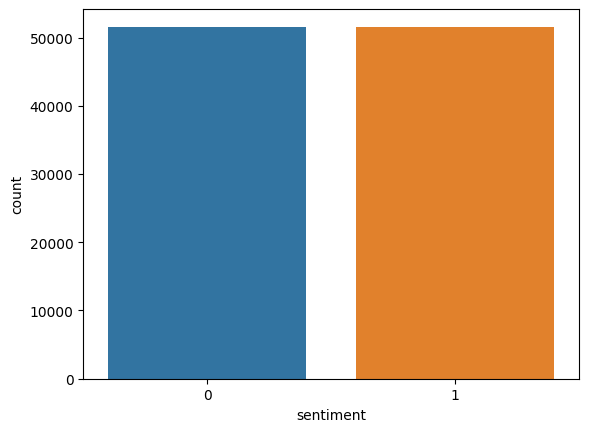

In [28]:
sns.countplot(x=Y_train_sample)

In [29]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since ’s Coraline. ...
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li..."
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...


In [30]:
test['reviewText'] = test['reviewText'].str.replace('\d+','',regex=True)
#Performing the same with test datasets as done above with train data set

In [31]:
test.head()

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...


In [32]:
test['reviewText'] = test['reviewText'].replace(np.nan, '0')
#replace(np.nan, '0') replaces all NaN (missing values) in the reviewText column of the test DataFrame with the string '0'.

TF-IDF is a statistical measure that reflects how important a word is to a document in a collection of documents. It is calculated by multiplying the term frequency (TF) of a word in a document by the inverse document frequency (IDF) of the word in the collection of documents.

In [33]:
revtext_test = tfidf.transform(test['reviewText']).toarray()

In [34]:
X_test = pd.DataFrame(revtext_test, columns = tfidf.get_feature_names_out())
X_test.head()

,aaron,ability,able,about,above,abrams,absence,absent,absolute,absolutely,...,your,yourself,youth,youthful,zany,zellweger,zero,zombie,zombies,zone
0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.13503,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
X_test.shape

(55315, 5000)

In [38]:
#model1


Logistic regression is a statistical model that can be used to predict the probability of a binary outcome (e.g., yes/no, true/false, 0/1).
Logistic regression works by fitting a logistic function to the data. The logistic function is a sigmoid curve that outputs a value between 0 and 1. The model is trained to minimize the difference between the predicted probabilities and the actual labels.

In [39]:
L_regression = LogisticRegression(max_iter=1000)
#This line creates a new LogisticRegression object with the maximum number of iterations set to 1000. 
LRfit = L_regression.fit(X_train_sample, Y_train_sample)
#This line fits the LogisticRegression model to the training data.
#The X_train_sample and Y_train_sample variables represent the training features and labels, respectively.
predict = LRfit.predict(X_test)
#This line makes predictions on the test data using the fitted LogisticRegression model. The X_test variable represents the test features.

In [40]:
f1_score(Y_train_sample.ravel(), LRfit.predict(X_train_sample), average='micro')

0.7994456504884478

In [39]:
#Model2

GridSearchCV to tune the hyperparameters of a LinearSVC model in Python with the scikit-learn library.

In [36]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
#This creates a cross-validator that will split the data into 5 training and test sets, with 20% of the data in the test set each time.
#The random_state parameter ensures that the splits are reproducible.
def Classifier_fit(estimator, X_train_sample, Y_train_sample, cv, name):
    estimator.fit(X_train_sample, Y_train_sample)
    cv_score = cross_val_score(estimator, X_train_sample, Y_train_sample,
                                   cv=cv, scoring='f1_micro')
    print(f"On an average, {name} model has f1 score of "
        f"{cv_score.mean():.3f} +/- {cv_score.std():.3f} on the training set.")
    return estimator

#This function takes a classifier, a training data sample, a training target sample, a cross-validator, and a model name as input
#fits the classifier to the training data and evaluates it using the cross-validator.

HyperParameter Tuning GridSearchCV

In [1]:
base_estimator = LinearSVC(loss ='squared_hinge',dual=False,random_state=42, max_iter=8000)
param_grid = {'C' : np.linspace(0.1,1,10)}
Linear_svc = GridSearchCV(base_estimator, param_grid,scoring='f1_micro', cv = 5)
Linear_svc.fit(X_train_sample,Y_train_sample)
print("Tuned  Parameters: {}".format(Linear_svc.best_params_))
print("Best score is {}".format(Linear_svc.best_score_))

In [37]:
linSVC=LinearSVC( C=0.1)
lin_ret = Classifier_fit(linSVC, X_train_sample, Y_train_sample.ravel(), cv,"LinearSVC")
predictSVC = linSVC.predict(X_test)

On an average, LinearSVC model has f1 score of 0.775 +/- 0.002 on the training set.


In [43]:
# model3

In [39]:
clf = AdaBoostClassifier()
Ada_ret = Classifier_fit(clf, X_train_sample, Y_train_sample.ravel(), cv,"Adaboost")
#very low score, all instances predicted in 1 single class

On an average, Adaboost model has f1 score of 0.635 +/- 0.004 on the training set.


In [40]:
predictAda = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     51592
           1       0.80      0.80      0.80     51592

    accuracy                           0.80    103184
   macro avg       0.80      0.80      0.80    103184
weighted avg       0.80      0.80      0.80    103184



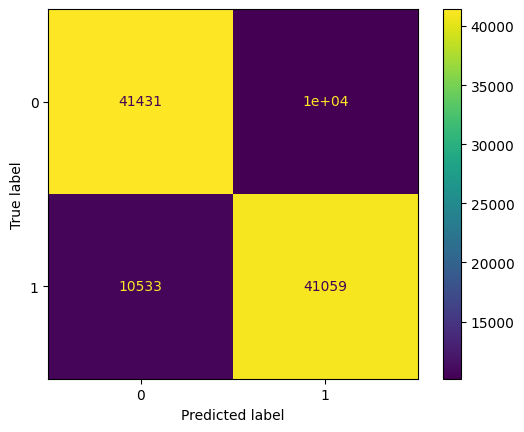

In [46]:
ConfusionMatrixDisplay.from_predictions(Y_train_sample, LRfit.predict(X_train_sample))
#Logistic Regression Confusion Matrix & Classification Report
print(classification_report(Y_train_sample, LRfit.predict(X_train_sample)))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     51592
           1       0.80      0.80      0.80     51592

    accuracy                           0.80    103184
   macro avg       0.80      0.80      0.80    103184
weighted avg       0.80      0.80      0.80    103184



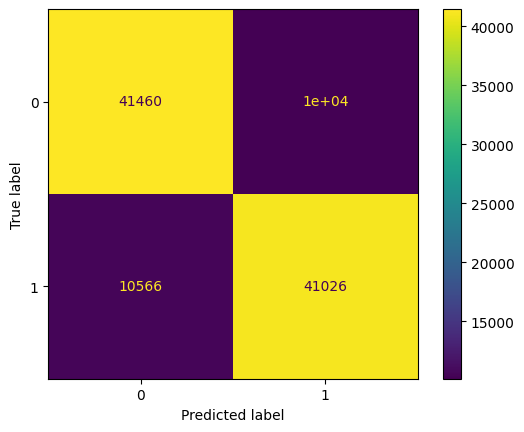

In [38]:
ConfusionMatrixDisplay.from_predictions(Y_train_sample, lin_ret.predict(X_train_sample))
#LinearSVC Confusion Matrix & Classification Report
print(classification_report(Y_train_sample, lin_ret.predict(X_train_sample)))

              precision    recall  f1-score   support

           0       0.62      0.69      0.66     51592
           1       0.65      0.59      0.62     51592

    accuracy                           0.64    103184
   macro avg       0.64      0.64      0.64    103184
weighted avg       0.64      0.64      0.64    103184



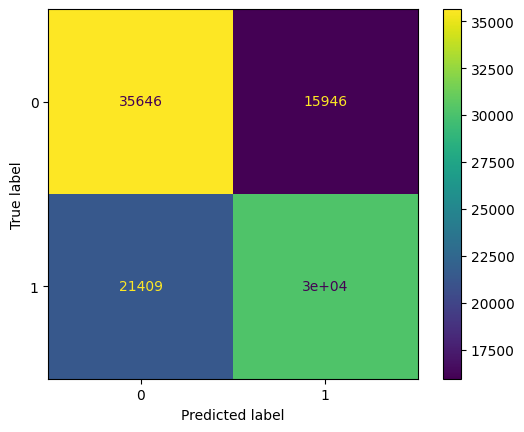

In [41]:
ConfusionMatrixDisplay.from_predictions(Y_train_sample, Ada_ret.predict(X_train_sample))
#AdaBoost Confusion Matrix & Classification Report
print(classification_report(Y_train_sample, Ada_ret.predict(X_train_sample)))

In [47]:
submission = pd.DataFrame(columns=['id','sentiment'])
submission['id'] = [i for i in range(55315)]
submission['sentiment'] = predict


In [48]:
submission['sentiment'] = submission['sentiment'].replace(1, 'POSITIVE')
submission['sentiment'] = submission['sentiment'].replace(0, 'NEGATIVE')
submission.head(10)

,id,sentiment
0,0,POSITIVE
1,1,POSITIVE
2,2,POSITIVE
3,3,POSITIVE
4,4,POSITIVE
5,5,POSITIVE
6,6,POSITIVE
7,7,NEGATIVE
8,8,NEGATIVE
9,9,NEGATIVE


In [49]:
submission.to_csv('submission.csv', index=False)